# Introduction to Famous Image Classifiers

Convolutional Neural Networks (CNNs) are a class of deep neural networks, most commonly applied to analyzing visual imagery. They have achieved remarkable success in various tasks such as image and video recognition, image classification, and also in medical image analysis.

## Data Processing

Before being fed into a CNN, data must undergo preprocessing to ensure it is in a suitable format for the model. This often includes normalization, where pixel values are scaled to a range (e.g., 0 to 1), and resizing, where images are resized to conform to the input size requirements of the network. Additionally, data augmentation techniques such as rotation, translation, and flipping can be used to increase the diversity of the training set, helping to improve the model's generalization.

## Models

CNNs consist of an input layer, output layer, and multiple hidden layers. The hidden layers of a CNN typically include convolutional layers, activation functions, pooling layers, and fully connected layers (FCLs). Below are some notable models:

### 1. Artificial Neural Network (ANN)

ANNs are the foundation upon which CNNs are built. They consist of layers of nodes connected by edges, with each edge having a weight that is adjusted during training. ANNs are versatile and can be used for a wide range of tasks beyond image processing.

### 2. LeNet

LeNet, one of the first convolutional neural networks, was designed for handwriting and character recognition. It consists of convolutional layers followed by subsampling layers, ending with fully connected layers.

### 3. VGG16

VGG16 is a deep CNN model that consists of 16 layers. It is characterized by its simplicity, using only 3x3 convolutional layers stacked on top of each other in increasing depth. Max pooling is used to reduce dimensionality and dense layers followed by a softmax activation function classify the inputs.

### 4. ResNet

Residual Networks (ResNet) introduced the concept of residual learning, where shortcut connections are used to allow gradients to flow through the network directly. This enables the training of much deeper networks by alleviating the vanishing gradient problem.

### 5. DenseNet

Dense Convolutional Network (DenseNet) connects each layer to every other layer in a feed-forward fashion. For each layer, the feature-maps of all preceding layers are used as inputs, and its own feature-maps are used as inputs into all subsequent layers, significantly reducing the number of parameters.

### 6. Inception/GoogLeNet

The Inception network, also known as GoogLeNet, introduced the inception module, which allows the network to choose from different kernel sizes at each layer, enabling it to adapt to various scales of features. It uses a complex architecture with multiple inception modules stacked upon each other, leading to a deep and wide structure.

## Loss Functions

Loss functions measure how well the model's predictions match the actual labels. For binary classification problems, Binary Cross-Entropy is used:

$$L(y, \hat{y}) = -\frac{1}{N} \sum_{i=1}^{N} [y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i)]$$

Where $y$ is the actual label, $\hat{y}$ is the predicted probability, and $N$ is the number of observations.

For multi-class classification problems involving $K$ classes, Cross-Entropy is the generalization:

$$L(y, \hat{y}) = -\frac{1}{N} \sum_{i=1}^{N} \sum_{k=1}^{K} y_{ik} \log(\hat{y}_{ik})$$

Here, $y_{ik}$ is a binary indicator of whether class $k$ is the correct classification for observation $i$, and $\hat{y}_{ik}$ is the predicted probability that observation $i$ is of class $k$.

CNNs are powerful tools for many applications in computer vision and beyond, with ongoing research continuously improving their capabilities and efficiency.

## Library

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# !pip install codecarbon

## Get Data

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [5]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [6]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [7]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [8]:
x_train.max(), x_train.min()

(255, 0)

## Visualize Data

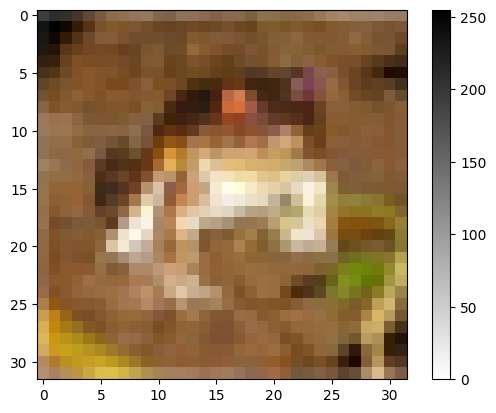

In [9]:
i=0
plt.imshow(x_train[i], cmap='binary')
plt.colorbar()

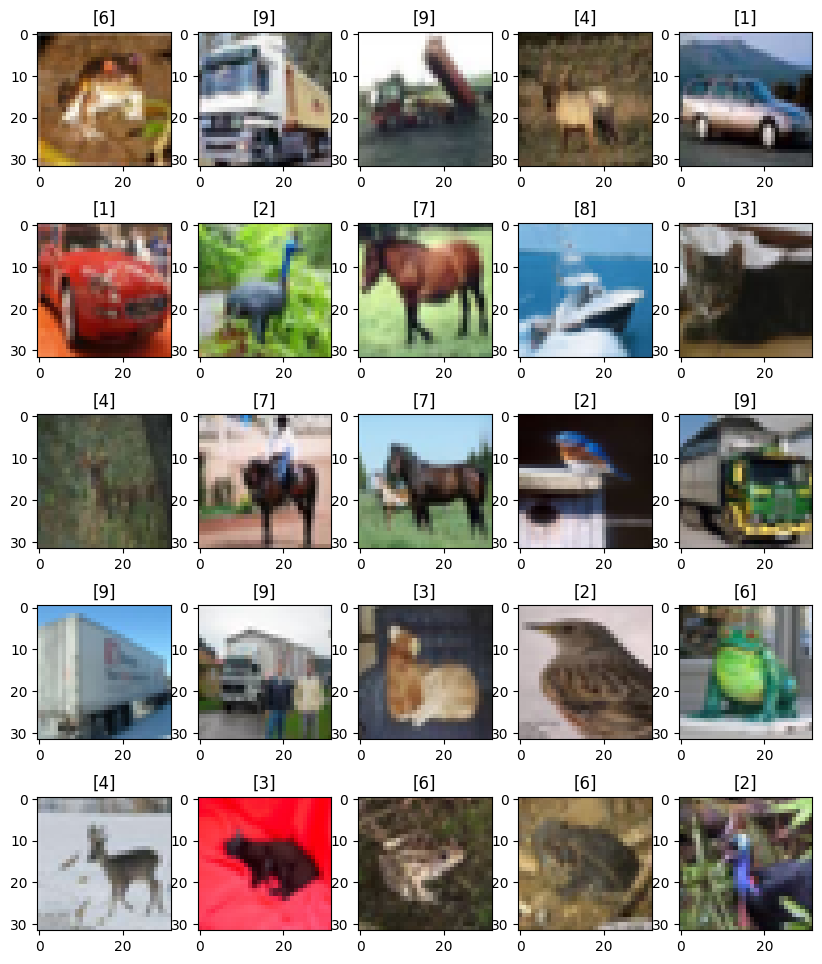

In [10]:
plt.figure(figsize=(10, 12))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(x_train[i], cmap='binary')
    plt.title(y_train[i])

plt.show()

## Data Processing

In [11]:
y_train_bin = tf.keras.utils.to_categorical(y_train)
y_test_bin = tf.keras.utils.to_categorical(y_test)
y_train_bin.shape, y_test_bin.shape

((50000, 10), (10000, 10))

In [12]:
x_train = x_train / 255.0
x_test = x_test / 255.0

## Model 1: Neural Network

Artificial Neural Networks (ANNs) are computational models inspired by the human brain's interconnected network of neurons, designed to recognize patterns and solve complex problems. ANNs are composed of layers of nodes or "neurons," each of which can receive input, process it, and pass on the output to the next layer. The networks "learn" by adjusting the weights of the connections based on the errors in predictions during the training process. This allows ANNs to perform a wide range of tasks, from simple classification to speech and image recognition, by effectively capturing the underlying relationships in the input data.

The original paper by Yann LeCun that introduced convolutional neural networks (CNNs), a specialized kind of ANN for processing data with a grid-like topology (such as images), is titled "Gradient-Based Learning Applied to Document Recognition." Although this seminal work did not mark the inception of ANNs themselves, it significantly impacted the development and application of neural networks in image recognition and processing. You can access this influential paper through the arXiv link: [https://arxiv.org/abs/1102.0183](https://arxiv.org/abs/1102.0183).

In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 256)               786688    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 828490 (3.16 MB)
Trainable params: 828490 (3.16 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
model.compile(
    optimizer='sgd',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [16]:
x_train.shape, y_train_bin.shape

((50000, 32, 32, 3), (50000, 10))

In [17]:
%%time

model.fit(
    x=x_train,
    y=y_train_bin,
    batch_size=10,
    validation_split=0.2,
    epochs=5
)

Epoch 1/5
4000/4000 [==============================] - 14s 3ms/step - loss: 1.8729 - accuracy: 0.3201 - val_loss: 1.7416 - val_accuracy: 0.3713
Epoch 2/5
4000/4000 [==============================] - 12s 3ms/step - loss: 1.6926 - accuracy: 0.3916 - val_loss: 1.6940 - val_accuracy: 0.3918
Epoch 3/5
4000/4000 [==============================] - 11s 3ms/step - loss: 1.6094 - accuracy: 0.4257 - val_loss: 1.6166 - val_accuracy: 0.4241
Epoch 4/5
4000/4000 [==============================] - 11s 3ms/step - loss: 1.5503 - accuracy: 0.4445 - val_loss: 1.6090 - val_accuracy: 0.4235
Epoch 5/5
4000/4000 [==============================] - 11s 3ms/step - loss: 1.5029 - accuracy: 0.4630 - val_loss: 1.5384 - val_accuracy: 0.4446
CPU times: user 1min 9s, sys: 8.43 s, total: 1min 18s
Wall time: 1min


In [18]:
model.evaluate(x_test, y_test_bin)

313/313 [==============================] - 1s 2ms/step - loss: 1.5062 - accuracy: 0.4611


[1.5061978101730347, 0.4611000120639801]

## Model 2: LeNet

LeNet, developed by Yann LeCun and colleagues, is a pioneering convolutional neural network (CNN) designed for handwritten and machine-printed character recognition. It marks one of the first successful applications of CNNs, introducing a structured architecture that includes convolutional layers to extract features from input images, pooling layers to reduce spatial dimensions, and fully connected layers to perform classification. The architecture of LeNet was instrumental in demonstrating the effectiveness of deep learning for image processing tasks, significantly influencing the development of more complex and efficient neural networks in later years. This groundbreaking work laid the foundation for modern deep learning in computer vision. The original paper detailing LeNet, titled "Gradient-Based Learning Applied to Document Recognition," can be found on ArXiv through the link: [https://arxiv.org/abs/1102.0183](https://arxiv.org/abs/1102.0183).

Make sure that in Convolutional layer, you reshape the dimension.

In [19]:
x_train.shape, x_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [20]:
x_train = x_train.reshape((50000, 32, 32, 3))
x_test = x_test.reshape((10000, 32, 32, 3))
x_train.shape, x_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

Randomized filters:

![image](https://www.researchgate.net/publication/322816297/figure/fig2/AS:663481913200640@1535197823870/Visualizing-the-convolutional-filters-of-the-customized-model-AlexNet-VGG16-VGG19-in.png)

Existing filter:

![image](https://miro.medium.com/v2/resize:fit:2724/1*5caL4vgvVwojnUpM6i2_EQ.png)

Hand crafted filters:

![image](https://www.mdpi.com/electronics/electronics-11-01063/article_deploy/html/images/electronics-11-01063-g002.png)

I would recommend to write the layers using the following notations.

[[32, [5,5]], [16, [5,5]], 120, 84]


In [21]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(5, 5), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    #tf.keras.layers.Dense(120, activation='relu'),
    tf.keras.layers.Dense(84, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         456       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 6)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 32)        4832      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 800)               0         
                                                                 
 dense_4 (Dense)             (None, 84)               

In [23]:
model.compile(
    optimizer='sgd',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [24]:
%%time

model.fit(
    x=x_train,
    y=y_train_bin,
    batch_size=10,
    validation_split=0.2,
    epochs=5
)

Epoch 1/5
4000/4000 [==============================] - 15s 3ms/step - loss: 1.8199 - accuracy: 0.3367 - val_loss: 1.5998 - val_accuracy: 0.4146
Epoch 2/5
4000/4000 [==============================] - 12s 3ms/step - loss: 1.5028 - accuracy: 0.4581 - val_loss: 1.4313 - val_accuracy: 0.4886
Epoch 3/5
4000/4000 [==============================] - 12s 3ms/step - loss: 1.3887 - accuracy: 0.5040 - val_loss: 1.3950 - val_accuracy: 0.5082
Epoch 4/5
4000/4000 [==============================] - 12s 3ms/step - loss: 1.3069 - accuracy: 0.5357 - val_loss: 1.3047 - val_accuracy: 0.5453
Epoch 5/5
4000/4000 [==============================] - 12s 3ms/step - loss: 1.2421 - accuracy: 0.5599 - val_loss: 1.2630 - val_accuracy: 0.5613
CPU times: user 1min 16s, sys: 8.88 s, total: 1min 25s
Wall time: 1min 5s


In [25]:
model.evaluate(x_test, y_test_bin)

313/313 [==============================] - 1s 2ms/step - loss: 1.2497 - accuracy: 0.5569


[1.24966561794281, 0.5569000244140625]

## Model 3: VGG16

It is taking the `conv2d` and `maxpooling` layers and make them repeat for a few more times.

![image](https://raw.githubusercontent.com/yiqiao-yin/WYNAssociates/main/figs/for_wyn_ed/cnn_adv_fig_1.png)

VGG16 is a deep convolutional neural network architecture known for its simplicity and depth, developed by Karen Simonyan and Andrew Zisserman from the Visual Geometry Group (VGG) at the University of Oxford. Introduced in the paper "Very Deep Convolutional Networks for Large-Scale Image Recognition," VGG16 was notable for its uniform architecture consisting of 16 layers, including 13 convolutional layers followed by 3 fully connected layers. The network employs 3x3 convolutional filters throughout, a small receptive field size, but stacks many such layers deep to achieve high levels of representational power. VGG16 significantly advanced the field of deep learning by demonstrating that depth is a critical component for achieving good performance in visual recognition tasks. The model achieved state-of-the-art performance in the ImageNet competition, and its architecture has become a popular choice for many computer vision applications due to its simplicity and effectiveness. The original paper can be accessed through the ArXiv link: [https://arxiv.org/abs/1409.1556](https://arxiv.org/abs/1409.1556).

In [26]:
from tensorflow.keras import models, layers

In [27]:
model = models.Sequential()

# First convolutional block
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

# Second convolutional block
model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

# Third convolutional block
model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

# Fourth convolutional block
model.add(layers.Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

# Fifth convolutional block
model.add(layers.Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

# Flattening and Fully Connected Layers
model.add(layers.Flatten())
model.add(layers.Dense(4096, activation='relu'))
#model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))  # Assuming 10 classes


In [28]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 128)       147584    
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 8, 8, 128)         0         
 g2D)                                                 

In [29]:
model.compile(
    optimizer='sgd',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

[CodeCarbon](https://codecarbon.io/) Make sure you report whatever number from this package along with what CPU/GPU you are using.

In [30]:
%%time

model.fit(
    x=x_train,
    y=y_train_bin,
    batch_size=10,
    validation_split=0.2,
    epochs=5
)

Epoch 1/5
4000/4000 [==============================] - 89s 21ms/step - loss: 2.3007 - accuracy: 0.1092 - val_loss: 2.2814 - val_accuracy: 0.1494
Epoch 2/5
4000/4000 [==============================] - 86s 21ms/step - loss: 2.0679 - accuracy: 0.2349 - val_loss: 1.9837 - val_accuracy: 0.2602
Epoch 3/5
4000/4000 [==============================] - 86s 21ms/step - loss: 1.8215 - accuracy: 0.3224 - val_loss: 1.6695 - val_accuracy: 0.3777
Epoch 4/5
4000/4000 [==============================] - 86s 21ms/step - loss: 1.5889 - accuracy: 0.4139 - val_loss: 1.4647 - val_accuracy: 0.4529
Epoch 5/5
4000/4000 [==============================] - 86s 21ms/step - loss: 1.3798 - accuracy: 0.4931 - val_loss: 1.2812 - val_accuracy: 0.5360
CPU times: user 7min 31s, sys: 10.5 s, total: 7min 42s
Wall time: 7min 14s


In [31]:
model.evaluate(x_test, y_test_bin)

313/313 [==============================] - 4s 9ms/step - loss: 1.2863 - accuracy: 0.5334


[1.2863340377807617, 0.5333999991416931]

### Track CO2 Emission (Optional)

For more details, refer [here](https://codecarbon.io/).

In [33]:
! pip install codecarbon

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 496.1/496.1 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 65.1 MB/s eta 0:00:00


In [34]:
from codecarbon import EmissionsTracker

In [35]:
tracker = EmissionsTracker()
tracker.start()

model.fit(
    x=x_train,
    y=y_train_bin,
    batch_size=10,
    validation_split=0.2,
    epochs=1
)

emissions: float = tracker.stop()
print(f"{emissions:.2f} kg CO2eq")

[codecarbon INFO @ 20:56:51] [setup] RAM Tracking...
[codecarbon INFO @ 20:56:51] [setup] GPU Tracking...
[codecarbon INFO @ 20:56:52] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 20:56:52] [setup] CPU Tracking...
[codecarbon WARNING @ 20:56:52] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 20:56:53] We saw that you have a Intel(R) Xeon(R) CPU @ 2.30GHz but we don't know it. Please contact us.
[codecarbon INFO @ 20:56:53] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.30GHz
[codecarbon INFO @ 20:56:53] >>> Tracker's metadata:
[codecarbon INFO @ 20:56:53]   Platform system: Linux-6.1.85+-x86_64-with-glibc2.35
[codecarbon INFO @ 20:56:53]   Python version: 3.10.12
[codecarbon INFO @ 20:56:53]   CodeCarbon version: 2.5.0
[codecarbon INFO @ 20:56:53]   Available RAM : 50.994 GB
[codecarbon INFO @ 20:56:53]   CPU count: 8
[codecarbon INFO @ 20:56:53]   CPU model: Intel(R) Xeon(R) CPU @ 2.30GHz
[codecarbon INFO @ 20:56:53]   GPU c

 676/4000 [====>.........................] - ETA: 1:05 - loss: 1.2493 - accuracy: 0.5451

[codecarbon INFO @ 20:57:08] Energy consumed for RAM : 0.000080 kWh. RAM Power : 19.122615337371826 W
[codecarbon INFO @ 20:57:08] Energy consumed for all GPUs : 0.000270 kWh. Total GPU Power : 64.78121513135468 W
[codecarbon INFO @ 20:57:08] Energy consumed for all CPUs : 0.000177 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 20:57:08] 0.000527 kWh of electricity used since the beginning.


1447/4000 [=========>....................] - ETA: 49s - loss: 1.2345 - accuracy: 0.5525

[codecarbon INFO @ 20:57:23] Energy consumed for RAM : 0.000159 kWh. RAM Power : 19.122615337371826 W


1450/4000 [=========>....................] - ETA: 49s - loss: 1.2346 - accuracy: 0.5523

[codecarbon INFO @ 20:57:23] Energy consumed for all GPUs : 0.000560 kWh. Total GPU Power : 69.61820294899303 W
[codecarbon INFO @ 20:57:23] Energy consumed for all CPUs : 0.000354 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 20:57:23] 0.001073 kWh of electricity used since the beginning.


2215/4000 [===============>..............] - ETA: 34s - loss: 1.2191 - accuracy: 0.5577

[codecarbon INFO @ 20:57:38] Energy consumed for RAM : 0.000239 kWh. RAM Power : 19.122615337371826 W
[codecarbon INFO @ 20:57:38] Energy consumed for all GPUs : 0.000849 kWh. Total GPU Power : 69.46352358368922 W
[codecarbon INFO @ 20:57:38] Energy consumed for all CPUs : 0.000531 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 20:57:38] 0.001619 kWh of electricity used since the beginning.


2980/4000 [=====================>........] - ETA: 19s - loss: 1.2062 - accuracy: 0.5632

[codecarbon INFO @ 20:57:53] Energy consumed for RAM : 0.000319 kWh. RAM Power : 19.122615337371826 W
[codecarbon INFO @ 20:57:53] Energy consumed for all GPUs : 0.001140 kWh. Total GPU Power : 69.90173041861 W
[codecarbon INFO @ 20:57:53] Energy consumed for all CPUs : 0.000708 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 20:57:53] 0.002167 kWh of electricity used since the beginning.


3742/4000 [===========================>..] - ETA: 5s - loss: 1.1930 - accuracy: 0.5686

[codecarbon INFO @ 20:58:08] Energy consumed for RAM : 0.000398 kWh. RAM Power : 19.122615337371826 W
[codecarbon INFO @ 20:58:08] Energy consumed for all GPUs : 0.001429 kWh. Total GPU Power : 69.39345637635107 W
[codecarbon INFO @ 20:58:08] Energy consumed for all CPUs : 0.000885 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 20:58:08] 0.002713 kWh of electricity used since the beginning.


4000/4000 [==============================] - 84s 21ms/step - loss: 1.1881 - accuracy: 0.5706 - val_loss: 1.0661 - val_accuracy: 0.6205


[codecarbon INFO @ 20:58:18] Energy consumed for RAM : 0.000453 kWh. RAM Power : 19.122615337371826 W
[codecarbon INFO @ 20:58:18] Energy consumed for all GPUs : 0.001627 kWh. Total GPU Power : 68.86043186926014 W
[codecarbon INFO @ 20:58:18] Energy consumed for all CPUs : 0.001008 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 20:58:18] 0.003088 kWh of electricity used since the beginning.


0.00 kg CO2eq


## Model 4: ResNet

[Link](https://arxiv.org/pdf/1512.03385.pdf)

![image](https://production-media.paperswithcode.com/methods/resnet-e1548261477164_2_mD02h5A.png)

ResNet, short for Residual Network, is a revolutionary neural network architecture that introduced the concept of residual learning to facilitate the training of much deeper networks. Developed by Kaiming He and colleagues, ResNet was designed to solve the problem of vanishing gradients by using shortcut connections that perform identity mapping, allowing layers to learn residual functions with reference to the layer inputs. This architecture enables the network to be significantly deeper—up to hundreds or even thousands of layers—while still being trainable and achieving outstanding performance. ResNet's effectiveness was demonstrated by its winning entry in the 2015 ImageNet Large Scale Visual Recognition Challenge (ILSVRC), setting new records in classification, detection, and localization tasks. The original paper, "Deep Residual Learning for Image Recognition," details the development and achievements of ResNet and has had a profound impact on the design of deep neural networks for computer vision and beyond. The paper can be found on ArXiv: [https://arxiv.org/abs/1512.03385](https://arxiv.org/abs/1512.03385).

In [36]:
import tensorflow as tf
from tensorflow.keras import layers, models, Input
from tensorflow.keras.models import Model

In [37]:
def identity_block(input_tensor, kernel_size, filters):
    filters1, filters2, filters3 = filters

    x = layers.Conv2D(filters1, (1, 1))(input_tensor)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)

    x = layers.Conv2D(filters2, kernel_size, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)

    x = layers.Conv2D(filters3, (1, 1))(x)
    x = layers.BatchNormalization()(x)

    x = layers.add([x, input_tensor])
    x = layers.Activation('relu')(x)
    return x

def conv_block(input_tensor, kernel_size, filters, strides=(2, 2)):
    filters1, filters2, filters3 = filters

    x = layers.Conv2D(filters1, (1, 1), strides=strides)(input_tensor)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)

    x = layers.Conv2D(filters2, kernel_size, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)

    x = layers.Conv2D(filters3, (1, 1))(x)
    x = layers.BatchNormalization()(x)

    shortcut = layers.Conv2D(filters3, (1, 1), strides=strides)(input_tensor)
    shortcut = layers.BatchNormalization()(shortcut)

    x = layers.add([x, shortcut])
    x = layers.Activation('relu')(x)
    return x

def build_resnet50(input_shape=(224, 224, 3), num_classes=1000):
    input_tensor = Input(shape=input_shape)

    # Initial convolution layer
    x = layers.ZeroPadding2D(padding=(3, 3))(input_tensor)
    x = layers.Conv2D(64, (7, 7), strides=(2, 2))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.ZeroPadding2D(padding=(1, 1))(x)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2))(x)

    # Residual blocks

    x = conv_block(x, 3, [64, 64, 256], strides=(1, 1))
    x = identity_block(x, 3, [64, 64, 256])

    x = conv_block(x, 3, [64, 64, 256], strides=(1, 1))
    x = identity_block(x, 3, [64, 64, 256])
    x = identity_block(x, 3, [64, 64, 256])

    x = conv_block(x, 3, [128, 128, 512])
    x = identity_block(x, 3, [128, 128, 512])
    x = identity_block(x, 3, [128, 128, 512])
    x = identity_block(x, 3, [128, 128, 512])

    x = conv_block(x, 3, [256, 256, 1024])
    x = identity_block(x, 3, [256, 256, 1024])
    x = identity_block(x, 3, [256, 256, 1024])
    x = identity_block(x, 3, [256, 256, 1024])
    x = identity_block(x, 3, [256, 256, 1024])

    x = conv_block(x, 3, [512, 512, 2048])
    x = identity_block(x, 3, [512, 512, 2048])
    x = identity_block(x, 3, [512, 512, 2048])

    # Final part
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(num_classes, activation='softmax')(x)

    # Create model
    model = Model(input_tensor, x)

    return model

In [38]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 128)       147584    
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 8, 8, 128)         0         
 g2D)                                                 

In [39]:
model = build_resnet50(input_shape=(32, 32, 3), num_classes=10)

In [40]:
model.compile(
    optimizer='sgd',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [41]:
%%time

model.fit(
    x=x_train,
    y=y_train_bin,
    batch_size=10,
    validation_split=0.2,
    epochs=5
)

Epoch 1/5
4000/4000 [==============================] - 168s 37ms/step - loss: 4.0321 - accuracy: 0.1888 - val_loss: 8.5228 - val_accuracy: 0.2076
Epoch 2/5
4000/4000 [==============================] - 149s 37ms/step - loss: 2.7356 - accuracy: 0.2896 - val_loss: 4.7935 - val_accuracy: 0.3346
Epoch 3/5
4000/4000 [==============================] - 147s 37ms/step - loss: 2.3127 - accuracy: 0.3368 - val_loss: 4.6774 - val_accuracy: 0.3800
Epoch 4/5
4000/4000 [==============================] - 148s 37ms/step - loss: 2.0564 - accuracy: 0.3770 - val_loss: 45.2650 - val_accuracy: 0.3387
Epoch 5/5
4000/4000 [==============================] - 145s 36ms/step - loss: 1.9132 - accuracy: 0.3943 - val_loss: 3.6325 - val_accuracy: 0.4426
CPU times: user 12min 54s, sys: 13 s, total: 13min 7s
Wall time: 12min 37s


In [42]:
model = build_resnet50(input_shape=(32, 32, 3), num_classes=10)

In [43]:
model.compile(
    optimizer='sgd',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [44]:
device_name = tf.test.gpu_device_name()
device_name

'/device:GPU:0'

In [45]:
%%time

with tf.device(device_name):
    model.fit(
        x=x_train,
        y=y_train_bin,
        batch_size=10,
        validation_split=0.2,
        epochs=5
    )

Epoch 1/5
4000/4000 [==============================] - 162s 37ms/step - loss: 3.7648 - accuracy: 0.2218 - val_loss: 6.2779 - val_accuracy: 0.2808
Epoch 2/5
4000/4000 [==============================] - 160s 40ms/step - loss: 2.6238 - accuracy: 0.3008 - val_loss: 5.2102 - val_accuracy: 0.3468
Epoch 3/5
4000/4000 [==============================] - 160s 40ms/step - loss: 2.2376 - accuracy: 0.3496 - val_loss: 11.4501 - val_accuracy: 0.4143
Epoch 4/5
4000/4000 [==============================] - 158s 40ms/step - loss: 2.0038 - accuracy: 0.3871 - val_loss: 7.0440 - val_accuracy: 0.4233
Epoch 5/5
4000/4000 [==============================] - 158s 40ms/step - loss: 1.8474 - accuracy: 0.4173 - val_loss: 5.5912 - val_accuracy: 0.4437
CPU times: user 13min 39s, sys: 13.8 s, total: 13min 53s
Wall time: 13min 19s


```py
model = None
model.compile
model.fit(epochs=1)
model.save("tmp.h5")

while error > 0.1:
    model = tf.keras.models.load_model("tmp.h5")
    model.fit(epochs=1)
    model.save("tmp.h5")
    error = None
```

In [46]:
model.evaluate(x_test, y_test_bin)

313/313 [==============================] - 6s 13ms/step - loss: 5.7956 - accuracy: 0.4391


[5.795601844787598, 0.4390999972820282]

## Model 5: DenseNet

In one sentence, DenseNet is ResNet skipping at *every* layer.

![image](https://pytorch.org/assets/images/densenet1.png)

DenseNet, short for Densely Connected Convolutional Networks, is a deep neural network architecture that innovates on the way layers communicate with each other. Introduced by Gao Huang, Zhuang Liu, Laurens van der Maaten, and Kilian Q. Weinberger, DenseNet improves upon traditional convolutional networks by connecting each layer directly to every other layer in a feed-forward fashion. In a DenseNet, each layer receives the feature maps from all preceding layers as inputs and passes its own feature maps to all subsequent layers, leading to a highly dense connectivity pattern. This architecture significantly reduces the number of parameters, alleviates the vanishing gradient problem, encourages feature reuse, and substantially decreases the risk of overfitting. DenseNet has demonstrated remarkable performance on a variety of visual recognition tasks, setting new benchmarks for accuracy and efficiency. The original paper, "Densely Connected Convolutional Networks," provides a comprehensive overview of the DenseNet architecture and its benefits. The paper can be accessed on ArXiv: [https://arxiv.org/abs/1608.06993](https://arxiv.org/abs/1608.06993).

In [47]:
import tensorflow as tf
from tensorflow.keras import layers, models, Input

In [48]:
def dense_block(x, num_layers, growth_rate):
    for _ in range(num_layers):
        output = layers.BatchNormalization()(x)
        output = layers.Activation('relu')(output)
        output = layers.Conv2D(4 * growth_rate, (1, 1), padding='same', kernel_initializer='he_normal')(output)
        output = layers.BatchNormalization()(output)
        output = layers.Activation('relu')(output)
        output = layers.Conv2D(growth_rate, (3, 3), padding='same', kernel_initializer='he_normal')(output)
        x = layers.Concatenate()([x, output])
    return x

def transition_layer(x, compression_factor):
    num_filters = int(x.shape[-1] * compression_factor)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.Conv2D(num_filters, (1, 1), padding='same', kernel_initializer='he_normal')(x)
    x = layers.AveragePooling2D((2, 2), strides=(2, 2))(x)
    return x

def build_densenet121(input_shape=(224, 224, 3), num_classes=1000, growth_rate=32, compression_factor=0.5):
    input_tensor = Input(shape=input_shape)

    # Initial convolution layer
    x = layers.Conv2D(2 * growth_rate, (7, 7), strides=(2, 2), padding='same', kernel_initializer='he_normal')(input_tensor)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

    # Dense blocks and transition layers
    x = dense_block(x, 6, growth_rate)
    x = transition_layer(x, compression_factor)

    #x = dense_block(x, 12, growth_rate)
    #x = transition_layer(x, compression_factor)

    # at this point, the data is so small that you can't do the dense block operation
    # x = dense_block(x, 24, growth_rate)
    # x = transition_layer(x, compression_factor)

    # x = dense_block(x, 16, growth_rate)

    # Global average pooling and output layer
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(num_classes, activation='softmax')(x)

    model = models.Model(input_tensor, x, name='densenet121')
    return model


[Conv+Dense+Transition, Dense+Transition]

In [49]:
# Build the DenseNet-121 model
densenet121_model = build_densenet121(input_shape=(32, 32, 3), num_classes=10)
densenet121_model.summary()

Model: "densenet121"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv2d_129 (Conv2D)         (None, 16, 16, 64)           9472      ['input_3[0][0]']             
                                                                                                  
 batch_normalization_114 (B  (None, 16, 16, 64)           256       ['conv2d_129[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_104 (Activation  (None, 16, 16, 64)           0         ['batch_normalizatio

In [50]:
densenet121_model.compile(
    optimizer='sgd',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [51]:
%%time

with tf.device(device_name):
    densenet121_model.fit(
        x=x_train,
        y=y_train_bin,
        batch_size=10,
        validation_split=0.2,
        epochs=5
    )

Epoch 1/5
4000/4000 [==============================] - 51s 12ms/step - loss: 1.5996 - accuracy: 0.4169 - val_loss: 1.4439 - val_accuracy: 0.4841
Epoch 2/5
4000/4000 [==============================] - 44s 11ms/step - loss: 1.3061 - accuracy: 0.5315 - val_loss: 1.1968 - val_accuracy: 0.5710
Epoch 3/5
4000/4000 [==============================] - 45s 11ms/step - loss: 1.1591 - accuracy: 0.5898 - val_loss: 1.5742 - val_accuracy: 0.4672
Epoch 4/5
4000/4000 [==============================] - 44s 11ms/step - loss: 1.0545 - accuracy: 0.6279 - val_loss: 1.0794 - val_accuracy: 0.6226
Epoch 5/5
4000/4000 [==============================] - 44s 11ms/step - loss: 0.9764 - accuracy: 0.6594 - val_loss: 1.3370 - val_accuracy: 0.5531
CPU times: user 4min 7s, sys: 11 s, total: 4min 18s
Wall time: 3min 50s


In [52]:
densenet121_model.evaluate(x_test, y_test_bin)

313/313 [==============================] - 2s 4ms/step - loss: 1.3262 - accuracy: 0.5529


[1.3261672258377075, 0.5529000163078308]

## Model 6: Inception

[paper](https://arxiv.org/pdf/1409.4842.pdf)

![image](https://media5.datahacker.rs/2018/11/Featured-Image-017-CNN-Inception-Network-1.jpg)

Google presented [GoogLeNet](https://arxiv.org/pdf/1409.4842.pdf) in 2014, the same year that VGGNet was introduced.  GoogLeNet won the ImageNet competition achieving a top-5 error rate of 6.67%, almost betting the human error rate (5%).

GoogLeNet introduced many ideas that helped the development of current state-of-the-art architectures. Instead of stacking more and more CNN layers, GoogLeNet introduced what was called inception modules:

![](https://i.ibb.co/JKqptrj/Googlenet-inception.png)

Those modules apply convolutions with 3 different sizes of kernels (1x1, 3x3 and 5x5) at the same level. The idea behind those modules is based on the premise that significant information can be presented in images at different scales. Therefore, by using a multi-scale approach, they are more likely to capture meaningful information. Moreover, they claimed that designing a wider architecture, instead of a deeper, helps the gradients to navigate throughout the entire network.

![](https://cdn-images-1.medium.com/max/1600/1*uW81y16b-ptBDV8SIT1beQ.png)

The architecture consisted of 9 inception modules stacked linearly, containing 22 deep CNN layers. However, in this network, the total number of parameters was reduced to 4 million! Authors also included two auxiliary classifiers in the middle part of the architecture to avoid the vanishing gradient problem.

You can find a Keras implementation [here](https://gist.github.com/joelouismarino/a2ede9ab3928f999575423b9887abd14).

In [53]:
from keras.applications.inception_v3 import InceptionV3

model = InceptionV3(include_top=True, weights='imagenet', classes=1000)

96112376/96112376 [==============================] - 0s 0us/step


In [54]:
from keras.models import Model
from keras.layers import Lambda, Input
from keras.layers import Dense, GlobalAveragePooling2D

In [55]:
# Define model (pre-trained)
model = InceptionV3(include_top=False, input_shape=(75, 75, 3), weights='imagenet')

# Resize Input images to 75x75
newInput = Input(batch_shape=(None, 32, 32, 3))
resizedImg = Lambda(lambda image: tf.compat.v1.image.resize_images(image, (75, 75)))(newInput)
newOutputs = model(resizedImg)
model = Model(newInput, newOutputs)

# Freeze all the layers
for layer in model.layers[:]:
    layer.trainable = False

# Add Dense layer to classify on CIFAR10
output = model.output
output = GlobalAveragePooling2D()(output)
output = Dense(units=10, activation='softmax')(output)
model = Model(model.input, output)

87910968/87910968 [==============================] - 0s 0us/step


In [56]:
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 lambda (Lambda)             (None, 75, 75, 3)         0         
                                                                 
 inception_v3 (Functional)   (None, 1, 1, 2048)        21802784  
                                                                 
 global_average_pooling2d_3  (None, 2048)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_11 (Dense)            (None, 10)                20490     
                                                                 
Total params: 21823274 (83.25 MB)
Trainable params: 20490 (80.04 KB)
Non-trainable params: 21802784 (83.17 MB)
______________

In [57]:
x_train.shape, x_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [58]:
y_train_bin.shape, y_test_bin.shape

((50000, 10), (10000, 10))

In [59]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [60]:
device_name = tf.test.gpu_device_name()
device_name

'/device:GPU:0'

In [61]:
%%time

with tf.device(device_name):
    model.fit(
        x=x_train, # be careful here!
        y=y_train_bin,
        batch_size=10,
        validation_split=0.2,
        epochs=10
    )

Epoch 1/10
4000/4000 [==============================] - 59s 13ms/step - loss: 1.3182 - accuracy: 0.5570 - val_loss: 1.2397 - val_accuracy: 0.5873
Epoch 2/10
4000/4000 [==============================] - 53s 13ms/step - loss: 1.1433 - accuracy: 0.6142 - val_loss: 1.2374 - val_accuracy: 0.5940
Epoch 3/10
4000/4000 [==============================] - 53s 13ms/step - loss: 1.0999 - accuracy: 0.6269 - val_loss: 1.2611 - val_accuracy: 0.5947
Epoch 4/10
4000/4000 [==============================] - 53s 13ms/step - loss: 1.0703 - accuracy: 0.6377 - val_loss: 1.2552 - val_accuracy: 0.5972
Epoch 5/10
4000/4000 [==============================] - 53s 13ms/step - loss: 1.0565 - accuracy: 0.6418 - val_loss: 1.2559 - val_accuracy: 0.5962
Epoch 6/10
4000/4000 [==============================] - 53s 13ms/step - loss: 1.0401 - accuracy: 0.6443 - val_loss: 1.2928 - val_accuracy: 0.5902
Epoch 7/10
4000/4000 [==============================] - 51s 13ms/step - loss: 1.0253 - accuracy: 0.6493 - val_loss: 1.2732 -

In [62]:
score = model.evaluate(x_test, y_test_bin)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 9s 19ms/step - loss: 1.3393 - accuracy: 0.5929
Test loss: 1.3393250703811646
Test accuracy: 0.5928999781608582


Ends here.